# Linear Discriminant Analysis (LDA)

 - Supervised dimensionality reduction
 - Project the input data to a linear subspace consisting of the directions which maximize separation between classes
 
 
 - Most useful in a multiclass setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [2]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

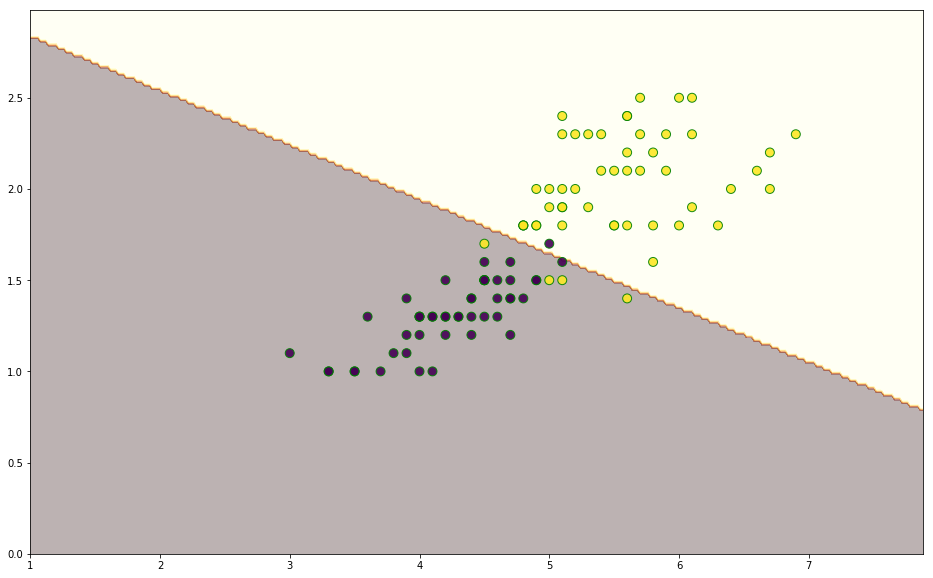

In [6]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.9, edgecolors='g');

***

## Comparison between LDA and PCA

 - PCA
     - Identifies the combinations of attributes (principal components) that account for the most variance in the data.

 - LDA
     - Tries to identify attributes that account for the most variance between classes
     - LDA is a supervised method, using known class labels